In [1]:
# Put these at the top of every notebook to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

General flow:

- import libraries
- set data path
- plot a sample data
- set image size
- select model
- find learning rate
- fit model

### What are the libraries that we need?

In [3]:
# General imports
from fastai.imports import *
# Data augmentation (transformations)
from fastai.transforms import *

# Convolutional learner class
from fastai.conv_learner import *
# Model architecture
from fastai.model import *
# Dataset handling class
from fastai.dataset import *
# SGD with restarts
from fastai.sgdr import *
# Plotting
from fastai.plots import *

In [5]:
# Use torch to check GPU hardware is available
print(f'Cuda is available: {torch.cuda.is_available()}')
print(f'Cudnn backend enabled: {torch.backends.cudnn.enabled}')

Cuda is available: True
Cudnn backend enabled: True


---

### Where is our data located?

In [8]:
# Set the PATH to our data
PATH = '/home/paperspace/data/dogscats/'

# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

#### Verify that the folder contains our data, and that they're the right structure

Verify we have a train/valid (or test) directory

In [9]:
os.listdir(PATH)

['sample', 'valid', 'models', 'train', 'tmp', 'test1']

In [10]:
os.listdir(PATH+'valid/')

['cats', 'dogs']

In [11]:
os.listdir(PATH+'valid/'+'cats/')[0]

'cat.11341.jpg'

In [13]:
cat = PATH+'valid/'+'cats/' + os.listdir(PATH+'valid/'+'cats/')[0]
cat

'/home/paperspace/data/dogscats/valid/cats/cat.11341.jpg'

In [14]:
os.path.isfile(cat)

True

### Load a sample image

In [15]:
# read the image (returns a numpy array)
img = plt.imread(cat)

Check the image shape

In [16]:
img.shape

(437, 499, 3)

What does our raw data look like?

In [17]:
# lets take a peak at the first 2 rows & 4 columns of the image array
img[:2, :4]

array([[[211, 212, 217],
        [210, 211, 216],
        [208, 207, 212],
        [202, 202, 204]],

       [[200, 201, 206],
        [198, 199, 203],
        [196, 195, 200],
        [193, 193, 195]]], dtype=uint8)

### Plot a sample image

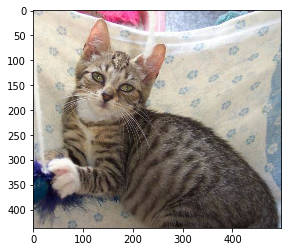

In [19]:
# show the image
plt.imshow(img)

---

### What image size do we use?

In [20]:
# Set image size to 224 for now
sz = 224

### Select model architecture

In [21]:
arch = resnet34

### Specify data object and a pretrained learner object

In [22]:
# Create a data object
data = ImageClassifierData.from_paths(path=PATH, tfms=tfms_from_model(f_model=arch, sz=sz))

# Create a learner object
learn = ConvLearner.pretrained(f=arch, data=data, precompute=True)

---

### Find a good learning rate

In [23]:
# Automatically find a good learning rate
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 302/360 [00:04<00:00, 65.38it/s, loss=0.311]


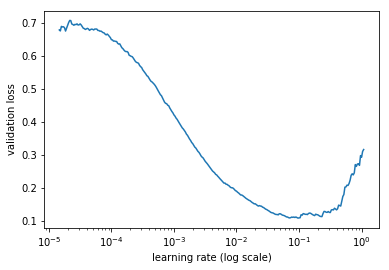

In [24]:
# Plot lr vs loss
learn.sched.plot()

In [28]:
# What learning rate should we use?
learn.sched.best

learn.sched.best/10

round(learn.sched.best/10, 2)

0.01

---